# Team Project 3
## Caitlin Sizemore and Ryan Fox
### DS 160-01 SP 2023

### Importing Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset=pd.read_csv("Hitters.csv")

In [3]:
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### Missing Values

In [4]:
dataset.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Count'>

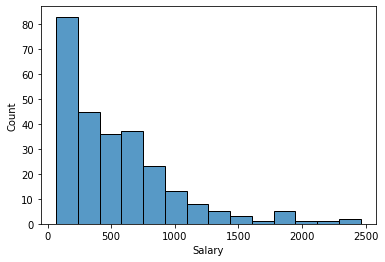

In [5]:
sns.histplot(dataset.Salary)

In [6]:
sal=dataset['Salary'].mean()
print(f"Mean Salary: {sal} in thousands")

Mean Salary: 535.9258821292775 in thousands


In [7]:
dataset['Salary'].fillna(sal, inplace=True)

### Split into Independent and Dependent

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [9]:
X=dataset.drop("Salary", axis=1)
y=dataset[['Salary']]

In [10]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N


### Categorical Data

In [11]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [12]:
X=pd.get_dummies(dataset[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague']], drop_first=True)

In [13]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1


- League: A=0, N=1
- Division:E=0, W=1
- NewLeague: A=0, N=1

## Experiment 1

### Split into Training,  Test, and Validation Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest=train_test_split(X,y, test_size=.2, random_state=42)

In [15]:
X_test, X_val, y_test, y_val=train_test_split(X_rest, y_rest, test_size=.5, random_state=42)

### Training Multiple Linear Regression Model on Training Set

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

### Intercept and Coefficient

In [17]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [[  -1.81935532    5.52041062    5.9259539    -0.91198313   -1.94452883
     5.15358725   -8.03146046   -0.23922411    0.61753942   -0.12789951
     0.87868529    0.87005762   -0.76129272    0.17958052    0.33298441
    -3.26590447   37.4941037  -101.26076896  -24.56959811]]
Intercept:  [382.75080043]


In [18]:
X_train.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

### Forumula
#### Salary = 382.75 - 1.82(AtBat) + 5.52(Hits) + 5.93(HmRun) - 0.91(Runs) - 1.94(RBI) + 5.15(Walks) - 8.03(Years)  - 0.24 (CAtBat) + 0.62(CHits) - 0.13(CHmRun) + 0.88(CRuns) + 0.87(CRBI) - 0.76(CWalks) + 0.18(PutOuts) + 0.33(Assists) - 3.27(Errors) + 37.49(League_N) - 101.26(Division_W) -24.57(NewLeague_N)

### Validation Set

In [19]:
y_predval=regressor.predict(X_val.values)

### Predicting Test Set Results

In [20]:
y_pred=regressor.predict(X_test.values)

### RMSE and R Square

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"R-Square: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R-Square: 0.57
MSE: 69533.13
RMSE: 263.69


## Experiment 2

### Split into Training, Test, and Validation Set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest=train_test_split(X,y, test_size=.25, random_state=42)

In [23]:
X_test, X_val, y_test, y_val=train_test_split(X_rest, y_rest, test_size=.5, random_state=42)

### Training Multiple Linear Regression Model on Training Set

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

### Intercept and Coefficient

In [25]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [[-1.97278931e+00  5.50965638e+00  4.56350884e+00 -1.53784353e-01
  -1.07410530e+00  4.73817158e+00 -9.38889437e+00 -1.97024272e-01
   5.18632185e-01 -8.85905646e-03  9.35023604e-01  7.87422935e-01
  -8.46369331e-01  2.09425743e-01  3.78291046e-01 -4.36859788e+00
   3.12955634e+01 -1.15663793e+02 -1.90635765e+01]]
Intercept:  [389.98307475]


### Forumula
#### Salary = 382.75 - 1.82(AtBat) + 5.52(Hits) + 5.93(HmRun) - 0.91(Runs) - 1.94(RBI) + 5.15(Walks) - 8.03(Years)  - 0.24 (CAtBat) + 0.62(CHits) - 0.13(CHmRun) + 0.88(CRuns) + 0.87(CRBI) - 0.76(CWalks) + 0.18(PutOuts) + 0.33(Assists) - 3.27(Errors) + 37.49(League_N) - 101.26(Division_W) -24.57(NewLeague_N)

# FIX

### Validation Set

In [26]:
y_predval=regressor.predict(X_val.values)

### Predicting Test Set Results

In [27]:
y_pred=regressor.predict(X_test.values)

### RMSE and R Square

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"R-Square: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R-Square: 0.47
MSE: 119291.23
RMSE: 345.39


## Experiment 3

### Split into Training,  Test, and Validation Set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_rest, y_train, y_rest=train_test_split(X,y, test_size=.3, random_state=42)

In [30]:
X_test, X_val, y_test, y_val=train_test_split(X_rest, y_rest, test_size=.5, random_state=42)

### Training Multiple Linear Regression Model on Training Set

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)

LinearRegression()

### Intercept and Coefficient

In [32]:
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [[-1.65465961e+00  4.72030184e+00  5.17004198e+00 -8.18014534e-02
  -1.38768696e+00  4.65178243e+00 -6.70664465e+00 -1.80571043e-01
   3.83229836e-01 -5.05713807e-01  9.62772642e-01  8.32976623e-01
  -7.12574619e-01  2.18510347e-01  2.61261558e-01 -3.60862565e+00
   5.61143024e+01 -1.09669669e+02 -3.10845498e+01]]
Intercept:  [358.54809944]


### Forumula
#### Salary = 382.75 - 1.82(AtBat) + 5.52(Hits) + 5.93(HmRun) - 0.91(Runs) - 1.94(RBI) + 5.15(Walks) - 8.03(Years)  - 0.24 (CAtBat) + 0.62(CHits) - 0.13(CHmRun) + 0.88(CRuns) + 0.87(CRBI) - 0.76(CWalks) + 0.18(PutOuts) + 0.33(Assists) - 3.27(Errors) + 37.49(League_N) - 101.26(Division_W) -24.57(NewLeague_N)

# FIX

### Validation Set

In [33]:
y_predval=regressor.predict(X_val.values)

### Predicting Test Set Results

In [34]:
y_pred=regressor.predict(X_test.values)

### RMSE and R Square

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"R-Square: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R-Square: 0.45
MSE: 113281.15
RMSE: 336.57
